In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
save_path = "plots"
output_path = "outputs"
if not os.path.exists(save_path):
    os.mkdir(save_path)

In [72]:
def clarke_error_grid(ref_values, pred_values, title_string, show_plot=True):
    """
    This function takes in the reference values and the prediction values as lists and returns a list with each index corresponding to the total number
    of points within that zone (0=A, 1=B, 2=C, 3=D, 4=E) and the plot
    """
    # Convert to numpy arrays for easier handling
    ref_values = np.array(ref_values)
    pred_values = np.array(pred_values)
    
    # Checking to see if the lengths of the reference and prediction arrays are the same
    assert len(ref_values) == len(pred_values), f"Unequal number of values (reference: {len(ref_values)}) (prediction: {len(pred_values)})."

    # Filter out invalid values (NaN, negative, or >400)
    valid_mask = (
        ~np.isnan(ref_values) & 
        ~np.isnan(pred_values) & 
        (ref_values >= 0) & 
        (pred_values >= 0) & 
        (ref_values <= 400) & 
        (pred_values <= 400)
    )
    
    ref_values_valid = ref_values[valid_mask]
    pred_values_valid = pred_values[valid_mask]
    
    values_out_grid = len(ref_values) - len(ref_values_valid)
    if values_out_grid > 0:
        print(f"Warning: {values_out_grid} values outside valid range [0, 400] mg/dl were excluded from analysis")
    
    # Use valid values for the rest of the function
    ref_values = ref_values_valid
    pred_values = pred_values_valid

    if show_plot:
        # Create figure with better size and DPI
        plt.figure(figsize=(5, 5), dpi=100)
        
        # Set up plot with better styling
        plt.scatter(ref_values, pred_values, marker='o', color='navy', s=12, alpha=0.6, edgecolors='black', linewidth=0.1)
        plt.title(title_string + " Clarke Error Grid", fontsize=16, fontweight='bold')
        plt.xlabel("Reference Concentration (mg/dl)", fontsize=14)
        plt.ylabel("Prediction Concentration (mg/dl)", fontsize=14)
        
        # Improved grid and ticks
        plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400], fontsize=12)
        plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400], fontsize=12)
        plt.grid(True, alpha=0.3, linestyle='--')
        plt.gca().set_facecolor('white')

        # Set axes lengths
        plt.xlim([0, 400])
        plt.ylim([0, 400])
        plt.gca().set_aspect('equal')
        
        # Zone lines with better styling - CORRECTED BOUNDARIES
        plt.plot([0,400], [0,400], ':', c='gray', linewidth=2, alpha=0.7, label='Perfect prediction')   #Theoretical 45 regression line
        
        # Zone boundary lines
        zone_line_color = 'black'
        zone_line_width = 1.5
        
        #Plot zone lines
        plt.plot([0, 175/3], [70, 70], '-', c=zone_line_color, linewidth=zone_line_width)
        #plt.plot([175/3, 320], [70, 400], '-', c=zone_line_color, linewidth=zone_line_width)
        plt.plot([175/3, 400/1.2], [70, 400], '-', c=zone_line_color, linewidth=zone_line_width)    #Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
        plt.plot([70, 70], [84, 400],'-', c=zone_line_color, linewidth=zone_line_width)
        plt.plot([0, 70], [180, 180], '-', c=zone_line_color, linewidth=zone_line_width)
        plt.plot([70, 290],[180, 400],'-', c=zone_line_color, linewidth=zone_line_width)
        # plt.plot([70, 70], [0, 175/3], '-', c=zone_line_color, linewidth=zone_line_width)
        plt.plot([70, 70], [0, 56], '-', c=zone_line_color, linewidth=zone_line_width)              #Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
        # plt.plot([70, 400],[175/3, 320],'-', c=zone_line_color, linewidth=zone_line_width)
        plt.plot([70, 400], [56, 320],'-', c=zone_line_color, linewidth=zone_line_width)
        plt.plot([180, 180], [0, 70], '-', c=zone_line_color, linewidth=zone_line_width)
        plt.plot([180, 400], [70, 70], '-', c=zone_line_color, linewidth=zone_line_width)
        plt.plot([240, 240], [70, 180],'-', c=zone_line_color, linewidth=zone_line_width)
        plt.plot([240, 400], [180, 180], '-', c=zone_line_color, linewidth=zone_line_width)
        plt.plot([130, 180], [0, 70], '-', c=zone_line_color, linewidth=zone_line_width)

        # Add zone titles with better styling
        zone_font_size = 15
        zone_font_weight = 'bold'
        
        plt.text(30, 15, "A", fontsize=zone_font_size, fontweight=zone_font_weight, ha='center')
        plt.text(370, 220, "B", fontsize=zone_font_size, fontweight=zone_font_weight, ha='center')
        plt.text(290, 370, "B", fontsize=zone_font_size, fontweight=zone_font_weight, ha='center')
        plt.text(160, 370, "C", fontsize=zone_font_size, fontweight=zone_font_weight, ha='center')
        plt.text(160, 15, "C", fontsize=zone_font_size, fontweight=zone_font_weight, ha='center')
        plt.text(30, 140, "D", fontsize=zone_font_size, fontweight=zone_font_weight, ha='center')
        plt.text(370, 90, "D", fontsize=zone_font_size, fontweight=zone_font_weight, ha='center')
        plt.text(30, 370, "E", fontsize=zone_font_size, fontweight=zone_font_weight, ha='center')
        plt.text(370, 15, "E", fontsize=zone_font_size, fontweight=zone_font_weight, ha='center')
        
        plt.tight_layout()

    #Statistics from the data
    zone = [0] * 5
    for i in range(len(ref_values)):
        if (ref_values[i] <= 70 and pred_values[i] <= 70) or (pred_values[i] <= 1.2*ref_values[i] and pred_values[i] >= 0.8*ref_values[i]):
            zone[0] += 1    #Zone A

        elif (ref_values[i] >= 180 and pred_values[i] <= 70) or (ref_values[i] <= 70 and pred_values[i] >= 180):
            zone[4] += 1    #Zone E

        elif ((ref_values[i] >= 70 and ref_values[i] <= 290) and pred_values[i] >= ref_values[i] + 110) or ((ref_values[i] >= 130 and ref_values[i] <= 180) and (pred_values[i] <= (7/5)*ref_values[i] - 182)):
            zone[2] += 1    #Zone C
        elif (ref_values[i] >= 240 and (pred_values[i] >= 70 and pred_values[i] <= 180)) or (ref_values[i] <= 175/3 and pred_values[i] <= 180 and pred_values[i] >= 70) or ((ref_values[i] >= 175/3 and ref_values[i] <= 70) and pred_values[i] >= (6/5)*ref_values[i]):
            zone[3] += 1    #Zone D
        else:
            zone[1] += 1    #Zone B

    return zone

In [73]:
def get_clarke_error_grid_stats(ref_values, pred_values, title_string="", show_plot=True, save_path=None):
    """
    Enhanced Clarke Error Grid analysis with detailed statistics
    """
    zone_counts = clarke_error_grid(ref_values, pred_values, title_string, show_plot)
    
    total_points = sum(zone_counts)
    zone_percentages = [count / total_points * 100 for count in zone_counts]
    
    stats = {
        'zone_counts': dict(zip(['A', 'B', 'C', 'D', 'E'], zone_counts)),
        'zone_percentages': dict(zip(['A', 'B', 'C', 'D', 'E'], zone_percentages)),
        'total_points': total_points,
        'clinically_acceptable': (zone_counts[0] + zone_counts[1]) / total_points * 100,  # A + B zones
        'clinically_dangerous': (zone_counts[3] + zone_counts[4]) / total_points * 100     # D + E zones
    }
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    
    return stats

Clarke Error Grid Analysis:
Total points analyzed: 3924719
Clinically acceptable (A+B): 97.95%
Clinically dangerous (D+E): 2.03%

Zone distribution:
Zone A: 88.10% (3457818 points)
Zone B: 9.85% (386586 points)
Zone C: 0.02% (727 points)
Zone D: 2.03% (79512 points)
Zone E: 0.00% (76 points)


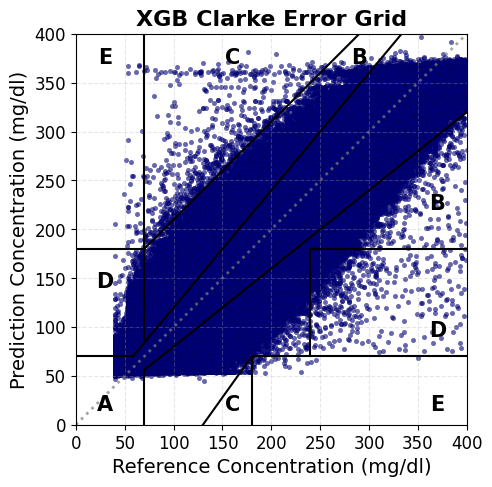

In [77]:
df = pd.read_csv(f"{output_path}/xgb_output.csv")

# Analisi completa con statistiche dettagliate
stats = get_clarke_error_grid_stats(
    df["target"], 
    df["y_pred"], 
    "XGB",
    show_plot=True,
    save_path=f"{save_path}/xgb_clarke_error_grid.png"
)

print("Clarke Error Grid Analysis:")
print(f"Total points analyzed: {stats['total_points']}")
print(f"Clinically acceptable (A+B): {stats['clinically_acceptable']:.2f}%")
print(f"Clinically dangerous (D+E): {stats['clinically_dangerous']:.2f}%")
print("\nZone distribution:")
for zone, percentage in stats['zone_percentages'].items():
    print(f"Zone {zone}: {percentage:.2f}% ({stats['zone_counts'][zone]} points)")

In [78]:
def analyze_best_worst_patients(df, title_prefix="", save_plots=True):
    """
    Identifica e analizza il migliore e peggior paziente basato su MAE
    """
    # Calcola MAE per paziente
    patient_mae = df.groupby('Patient_ID').apply(
        lambda x: np.mean(np.abs(x['target'] - x['y_pred']))
    ).sort_values()
    
    # Identifica migliore e peggior paziente
    best_Patient_ID = patient_mae.index[0]
    worst_Patient_ID = patient_mae.index[-1]
    
    print(f"\n{'='*60}")
    print(f"ANALISI MIGLIORE/PEGGIOR PAZIENTE - {title_prefix}")
    print(f"{'='*60}")
    
    # Analizza migliore paziente
    best_patient_data = df[df['Patient_ID'] == best_Patient_ID]
    worst_patient_data = df[df['Patient_ID'] == worst_Patient_ID]
    
    results = {}
    
    # Analisi migliore paziente
    print(f"\nMIGLIORE PAZIENTE (ID: {best_Patient_ID}):")
    print(f"MAE: {patient_mae.iloc[0]:.2f} mg/dl")
    print(f"Numero di punti: {len(best_patient_data)}")
    print(f"Range glucosio: {best_patient_data['target'].min():.1f} - {best_patient_data['target'].max():.1f} mg/dl")
    
    best_stats = get_clarke_error_grid_stats(
        best_patient_data['target'], 
        best_patient_data['y_pred'], 
        f"{title_prefix} - Patient {best_Patient_ID}",
        show_plot=save_plots,
        save_path=f"{save_path}/{title_prefix.lower().replace(' ', '_')}_best_patient_ceg.png" if save_plots else None
    )
    
    results['best_patient'] = {
        'id': best_Patient_ID,
        'mae': patient_mae.iloc[0],
        'stats': best_stats,
        'data_points': len(best_patient_data)
    }
    
    print(f"  Clinicamente accettabile (A+B): {best_stats['clinically_acceptable']:.1f}%")
    print(f"  Clinicamente pericoloso (D+E): {best_stats['clinically_dangerous']:.1f}%")
    
    # Analisi peggior paziente
    print(f"\nPEGGIOR PAZIENTE (ID: {worst_Patient_ID}):")
    print(f"MAE: {patient_mae.iloc[-1]:.2f} mg/dl")
    print(f"Numero di punti: {len(worst_patient_data)}")
    print(f"Range glucosio: {worst_patient_data['target'].min():.1f} - {worst_patient_data['target'].max():.1f} mg/dl")
    
    worst_stats = get_clarke_error_grid_stats(
        worst_patient_data['target'], 
        worst_patient_data['y_pred'], 
        f"{title_prefix} - Patient {worst_Patient_ID}",
        show_plot=save_plots,
        save_path=f"{save_path}/{title_prefix.lower().replace(' ', '_')}_worst_patient_ceg.png" if save_plots else None
    )
    
    results['worst_patient'] = {
        'id': worst_Patient_ID,
        'mae': patient_mae.iloc[-1],
        'stats': worst_stats,
        'data_points': len(worst_patient_data)
    }
    
    print(f"  Clinicamente accettabile (A+B): {worst_stats['clinically_acceptable']:.1f}%")
    print(f"  Clinicamente pericoloso (D+E): {worst_stats['clinically_dangerous']:.1f}%")
    
    # Statistiche comparative
    print(f"\nCONFRONTO:")
    print(f"Differenza MAE: {patient_mae.iloc[-1] - patient_mae.iloc[0]:.2f} mg/dl")
    print(f"Differenza Zone A+B: {best_stats['clinically_acceptable'] - worst_stats['clinically_acceptable']:.1f}%")
    
    return results, patient_mae

C:\Users\cerch\AppData\Local\Temp\ipykernel_7352\2741443584.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  patient_mae = df.groupby('Patient_ID').apply(



ANALISI MIGLIORE/PEGGIOR PAZIENTE - XGB

MIGLIORE PAZIENTE (ID: 3906):
MAE: 9.48 mg/dl
Numero di punti: 18833
Range glucosio: 40.0 - 257.0 mg/dl
  Clinicamente accettabile (A+B): 97.5%
  Clinicamente pericoloso (D+E): 2.5%

PEGGIOR PAZIENTE (ID: 3896):
MAE: 21.43 mg/dl
Numero di punti: 14863
Range glucosio: 40.0 - 400.0 mg/dl
  Clinicamente accettabile (A+B): 97.8%
  Clinicamente pericoloso (D+E): 1.8%

CONFRONTO:
Differenza MAE: 11.95 mg/dl
Differenza Zone A+B: -0.3%


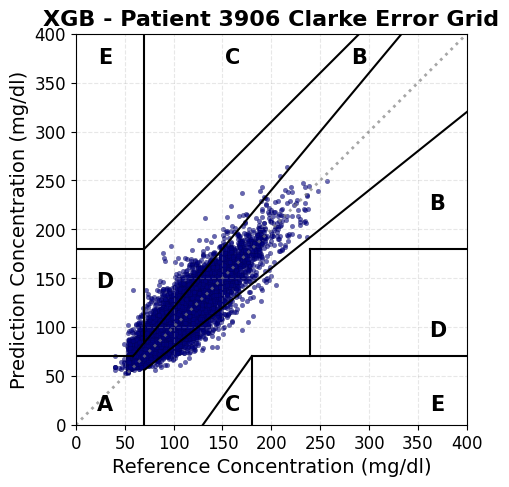

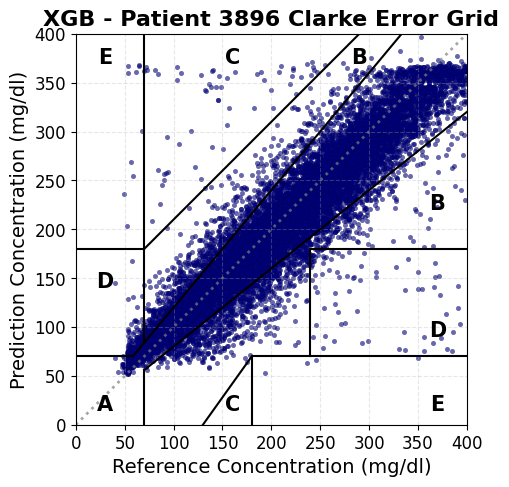

In [79]:
# Analisi migliore/peggior paziente
patient_results, patient_mae_ranking = analyze_best_worst_patients(df, "XGB", save_plots=True)